# **HW 4: Ensembel methods**
**HW Due date is 03/18/2025, 23:59 pm**

Objective:
* To understand the basics of Ensembles classifiers.
* To practice building these models using sample datasets.
* To visualize model performance using different metrics.

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the Cleveland Heart Disease dataset
# Replace 'path_to_your_file.data' with the actual path to your .data file
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv("C:\\Users\\kaycl\\Downloads\\processed-2.cleveland.data", header=None, delimiter=',', names=names) # remember to have double slashes between the words in the file path to avoid syntax errors

In [70]:
# Preprocess dataset
data = data.replace('?', np.nan).dropna()
data['target'] = (data['target'] > 0).astype(int) #This line converts the 'HD' column into a binary attribute, where any value greater
 # than 0 is considered as presence of heart disease (1), and 0 otherwise."""

## Your code starts here
le = LabelEncoder() # labelEncoder added to fix errors with XGboost. This converts categories to integers since it's the only thing XGboost can take (numeric data)
data['ca'] = le.fit_transform(data['ca'])
data['thal'] = le.fit_transform(data['thal'])
"""In this scenario, the target is our output. Therefore, to determine X and y, we first drop the target from the data in x, leaving only the other 
data points. This lets us just have y being our output: The thing that we consider the presence of heart disease."""
X = data.drop(columns=['target']) # drop the columns
y = data['target'] # give the column that was dropped
#split the dataset with test_size=0.2
"""Once again, use the train_test_split function. Train_test takes in arrays (data x and y), test size, train size, random state, shuffle, and stratify.
for the purposes of what we need now, we will not be using the last two args."""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size = 0.80, random_state = 42)
## Your code ends here

# Standardizing the features
## Your code starts here
"""To standardize features, it involves intializing the standard scaler, followed by transforming training data for x, then its testing data."""
scaler = StandardScaler()
"""use the scaler.fit_transform() function to standardize the data"""
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# Reminder: In short, fit gets us the mean and std dev for a given feature to be used for more scaling. Transform performs scaling using the mean and std dev
# values calculated from the fit function.

Training Bagging...
Bagging Evaluation Metrics:

Confusion Matrix:
[[31  5]
 [ 5 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        36
           1       0.79      0.79      0.79        24

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



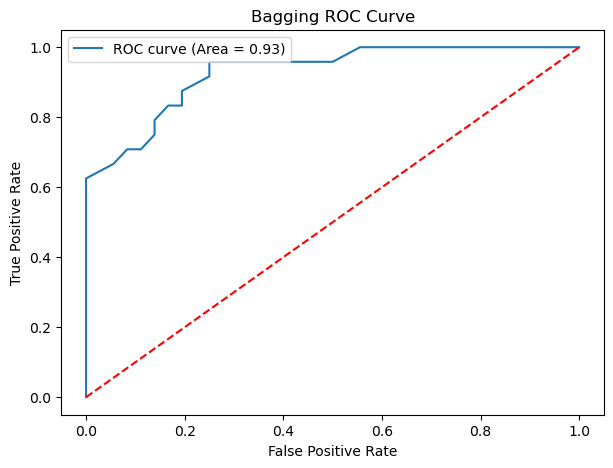

Training AdaBoost...
AdaBoost Evaluation Metrics:

Confusion Matrix:
[[31  5]
 [ 3 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.81      0.88      0.84        24

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60



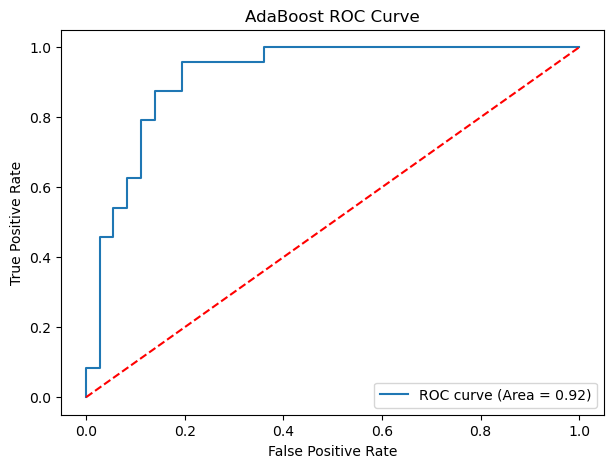

Training Random Forest...
Random Forest Evaluation Metrics:

Confusion Matrix:
[[32  4]
 [ 4 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



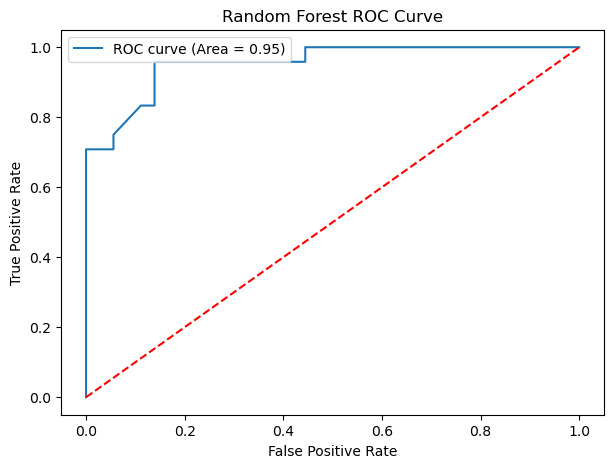

Training XGBoost...
XGBoost Evaluation Metrics:

Confusion Matrix:
[[29  7]
 [ 3 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.85        36
           1       0.75      0.88      0.81        24

    accuracy                           0.83        60
   macro avg       0.83      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60



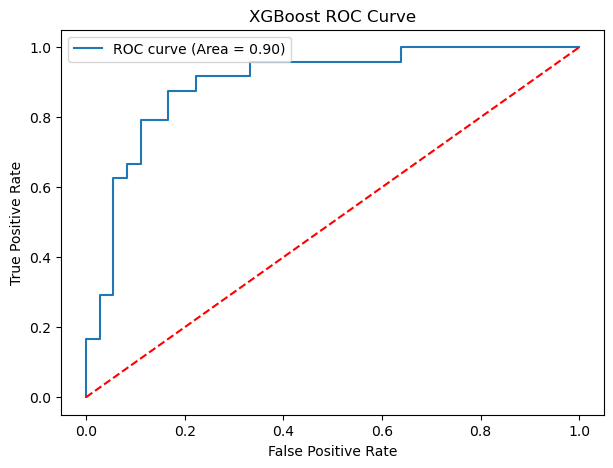

In [72]:
# Define ensemble classifiers
classifiers = {
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42, algorithm='SAMME'), # explicity change algorithm to samme to get rid of warning
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=50, random_state=42)
}

# Train and evaluate classifiers
"""The main logic here is the program is iterating through the different classifiers and training the model on all of them for comparison purposes."""

for name, clf in classifiers.items():
    print(f"Training {name}...")
    ## Your code starts here
    #train and predict for each model
    clf.fit(X_train, y_train) # use fit function to train x and y training data
    y_pred = clf.predict(X_test) # y_pred predicts using X_test data 
    ## Your code ends here

    # Compute evaluation metrics
    """We'll use classification report for the eval metrics"""
    ## Your code starts here
    print(f"{name} Evaluation Metrics:\n")
    matrix = confusion_matrix(y_test, y_pred) # use function to get matrix. Confusion matrix is used to quantify the performance of our classification model.
    # Rows = actual classes. Columns = predicted classes.
    """More Detail: True Positive (TP): The model correctly predicts a positive class.False Positive (FP): The model predicts a positive class, 
    but the actual class is negative.True Negative (TN): The model correctly predicts a negative class. 
    False Negative (FN): The model predicts a negative class, but the actual class is positive."""
    print(f"Confusion Matrix:\n{matrix}")
    classification = classification_report(y_test, y_pred) # generate more explicit data. use y test then y pred
    print(f"Classification Report:\n{classification}")
    ## Your code ends here

    # Compute ROC curve
    ## Your code starts here
    """Overall calculation logic: We're computing/plotting the TPR (true positive rate) and FPR (false positive rate) using different classifiers.
    In this instance, the fpr is y_test, and the tpr is y_prob. In the graphs, we also need to show the area of the ROC curve"""
    y_prob = clf.predict_proba(X_test)[:, 1] # predict proba usage because we want probabilities rather than class predictions. Specifically, we want it for class 1 (is there heart disease?)
    fpr, tpr, _ = roc_curve(y_test, y_prob) # grab our fpr and tpr (along with placeholder _). Initialize it to the rate of change for testing data and probability 
    roc_auc = auc(fpr, tpr) # compute area under curve
    ## Your code ends here

    # Plot ROC curve
    ## Your code starts here
    plt.figure(figsize = (7, 5))
    plt.plot(fpr, tpr, label = f'ROC curve (Area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{name} ROC Curve")
    plt.legend()
    plt.show()
    ## Your code ends here

The classification report generated by **scikit-learn's** classification_report function provides a comprehensive summary of the performance of a classifier for each class in a multi-class classification problem. Let's break down the different components of the classification report:

# Precision:

Precision measures the proportion of true positive predictions among all positive predictions made by the classifier for each class.
It is calculated as the ratio of true positives to the sum of true positives and false positives.
Precision is a measure of the classifier's ability to avoid false positives. A higher precision indicates fewer false positives.
#Recall (Sensitivity):

Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions that were correctly identified by the classifier for each class.
It is calculated as the ratio of true positives to the sum of true positives and false negatives.
Recall is a measure of the classifier's ability to capture all positive instances. A higher recall indicates fewer false negatives.
#F1-score:

The F1-score is the harmonic mean of precision and recall.
It provides a balance between precision and recall and is useful for comparing classifiers that have different trade-offs between false positives and false negatives.
The F1-score ranges from 0 to 1, with higher values indicating better overall performance in terms of both precision and recall.
#Support:

Support indicates the number of actual occurrences of each class in the test dataset.
For each class, the support value represents the number of samples belonging to that class in the test dataset.
Support is important for interpreting the reliability of the evaluation metrics (precision, recall, F1-score) for each class. Classes with higher support values have more reliable evaluation metrics because they are based on a larger number of samples.
#Macro Average:

The macro average (macro avg) is the average of the precision, recall, and F1-score calculated for each class separately.
It is obtained by averaging these scores across all classes, giving each class equal weight.
The macro average treats all classes equally, regardless of their size or distribution in the dataset.
It is useful for evaluating the overall performance of the classifier across multiple classes.

In summary, the classification report provides a detailed breakdown of the precision, recall, F1-score, and support for each class, as well as the macro average, allowing for a comprehensive assessment of the classifier's performance in a multi-class classification problem.

In [78]:
# First define a single decision tree classifier
## Your code starts here
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)  
## Your code ends here

# Compare variance reduction by generating the classification report
print("\nVariance Reduction Comparison:")
print("Single Decision Tree - Classification Report:")
## Your code starts here
classification_report(y_test, y_pred)
## Your code ends here

for name, clf in classifiers.items():
## Your code starts here
    print(f"{name} - Classification Report:\n")
    clf.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test, y_pred))
## Your code ends here



Variance Reduction Comparison:
Single Decision Tree - Classification Report:
Bagging - Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.78      0.84        36
           1       0.72      0.88      0.79        24

    accuracy                           0.82        60
   macro avg       0.81      0.83      0.81        60
weighted avg       0.83      0.82      0.82        60

AdaBoost - Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.78      0.84        36
           1       0.72      0.88      0.79        24

    accuracy                           0.82        60
   macro avg       0.81      0.83      0.81        60
weighted avg       0.83      0.82      0.82        60

Random Forest - Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.78      0.84        36
           1       0.72      0.88      0.79       

**Question:** Explain how using ensemble techniques imporve the classification results in terms of bias and variance?

**Answer:** Ensemble techniques address bias and variance. In short, bagging works by using multiple models

# Submission Guidelines:

* Implement the above steps in a Jupyter Notebook file.
* Save your ipython code and name it as: lastname_firstname_HW4.ipynb (.ipynb extension)
* Include comments and explanations to describe your approach and the rationale behind each step.
* Submit on Canvas.